### In this task I used 3 transformation which are log, exponential and straight line. I observed that staright line
has 95% accuracy while other two have 85% and 93% respectively. Hence i think we should stick to staright line 
transformation in  this case.

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [299]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


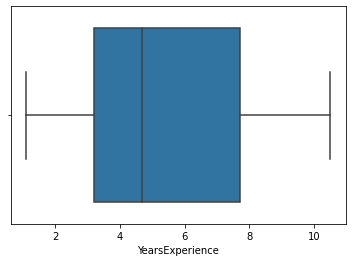

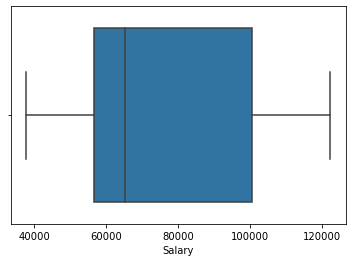

In [300]:
plt.figure(figsize=(6,4))
sns.boxplot(df['YearsExperience'])
plt.figure(figsize=(6,4))
sns.boxplot(df['Salary'])
plt.show()

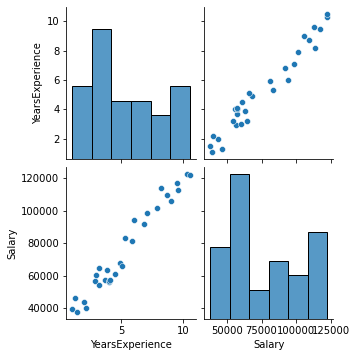

In [301]:
sns.pairplot(df)
plt.show()

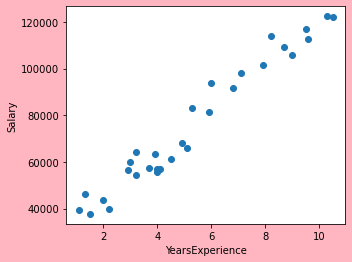

In [302]:
plt.figure(figsize = (5,4), facecolor = 'lightpink')
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [303]:
##This shows high degree of postive correlation which as experinac increases salary increases

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

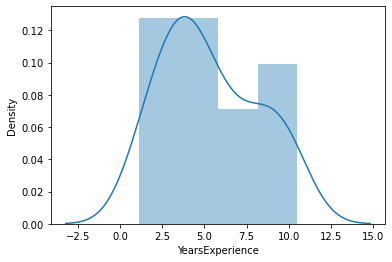

In [304]:
sns.distplot(df['YearsExperience'])


C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

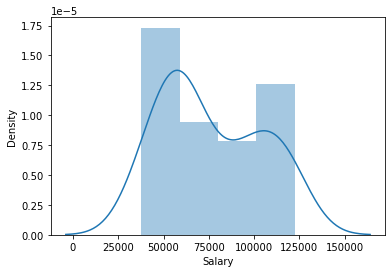

In [305]:
sns.distplot(df['Salary'])

In [306]:
# Visualization of regresion line over the scatter plot of YearsExperience and Salary using model y = mx+c, 
#which is a staright line

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

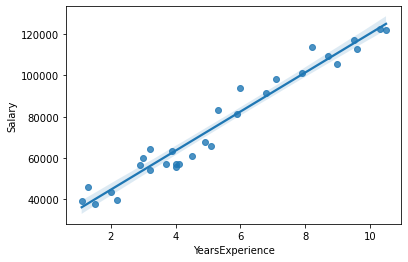

In [307]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data = df).fit()
sns.regplot(x="YearsExperience",y="Salary",data=df)

In [308]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [309]:
model.summary()
#r square value is 0.957 and Adj R-squared:0.955

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        23:49:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
df['pred_salary']=prediction
prediction

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [311]:
df['residuals']=model.resid
df

,YearsExperience,Salary,pred_salary,residuals
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306
5,2.9,56642.0,53197.090931,3444.909069
6,3.0,60150.0,54142.087163,6007.912837
7,3.2,54445.0,56032.079627,-1587.079627
8,3.2,64445.0,56032.079627,8412.920373
9,3.7,57189.0,60757.060788,-3568.060788


In [312]:
prediction.corr(df.pred_salary)

1.0

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pred_salary', ylabel='Density'>

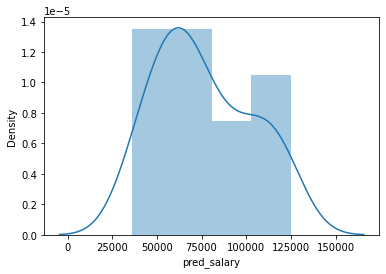

In [313]:
sns.distplot(df['pred_salary'])

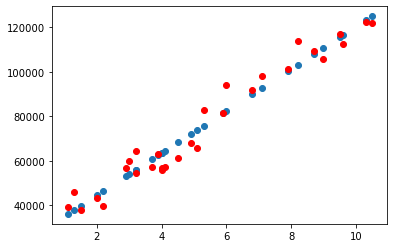

In [314]:
plt.scatter(df.YearsExperience,df.pred_salary)
plt.scatter(df.YearsExperience,df.Salary,color='red')
#Visualisation of predicted salary and actual salary

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

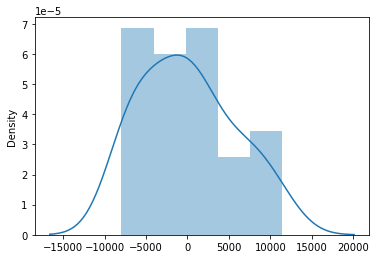

In [315]:
sns.distplot(model.resid)

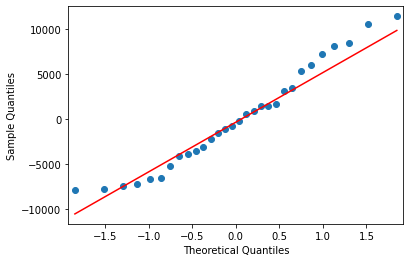

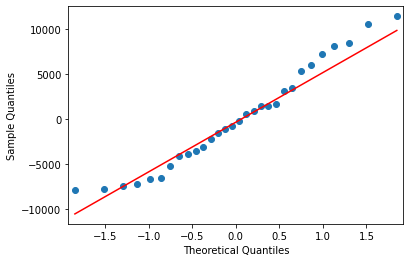

In [316]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

In [317]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [318]:
#This above model has 95% accuracy.

# To compare model with other models lets create another model using log function

In [319]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data= df).fit()
model2

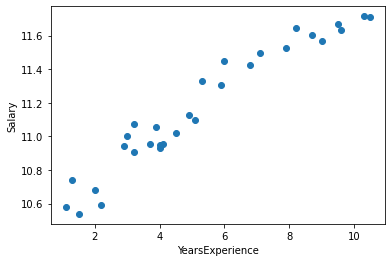

In [320]:
plt.scatter(df['YearsExperience'],np.log(df['Salary']))
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [321]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [322]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        23:49:22   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
pred_model2 = model2.predict(df['YearsExperience'])
pred_model2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [324]:
df['pred_salaryModel2'] = pred_model2
df

,YearsExperience,Salary,pred_salary,residuals,pred_salaryModel2
0,1.1,39343.0,36187.158752,3155.841248,18795.848339
1,1.3,46205.0,38077.151217,8127.848783,25575.235192
2,1.5,37731.0,39967.143681,-2236.143681,31382.551905
3,2.0,43525.0,44692.124842,-1167.124842,43057.262306
4,2.2,39891.0,46582.117306,-6691.117306,46925.138875
5,2.9,56642.0,53197.090931,3444.909069,58136.050079
6,3.0,60150.0,54142.087163,6007.912837,59511.842441
7,3.2,54445.0,56032.079627,-1587.079627,62130.943929
8,3.2,64445.0,56032.079627,8412.920373,62130.943929
9,3.7,57189.0,60757.060788,-3568.060788,68022.718504


In [325]:
#r squared value is 0.854 in model2 which is 95% accuracy
#while the r square value for mmodel is 0.957 which is quite good i.e. 95% accuracy 

# now lets try Exponential transformation

In [326]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=df).fit()

In [327]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [328]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        23:49:22   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# This above exponential transforation has 0.932 r squared value which is  93% accurcay

# After comparing abouve 3 models with r squared values in order to have  more accuracy we
should go for straight line which first  with accuracy 95%model